In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
def main():
    '''main operation'''

    rx3, ry3 = radialxvg('TIP3P-computed-rdf-check-npt-oo.xvg')
    rx4, ry4 = radialxvg('TIP4P-computed-rdf-check-npt-oo.xvg')
    plotRadial(rx3, ry3, 'O-O Radial Distribution of TIP3P')
    plotRadial(rx4, ry4, 'O-O Radial Distribution of TIP4P')
    x, y, z = dimensionxvg('SPC-dimension-check-npt.xvg')
    x3, y3, z3 = dimensionxvg('TIP3P-dimension-check-npt.xvg')
    x4, y4, z4 = dimensionxvg('TIP4P-dimension-check-npt.xvg')
    vspc = volume(x, y, z)
    vtip3p = volume(x3, y3, z3)
    vtip4p = volume(x4, y4, z4)
    plotDim(vspc, vtip3p, vtip4p, 'Box Volume vs. Time')

    return 

In [3]:
def radialxvg(filename):
    with open(str(filename), encoding="utf8", newline='') as xvg_data:
        datareader = csv.reader(xvg_data, delimiter=' ', quotechar='|')
        counter = 0
        x = []
        y = []
        for row in datareader:
            if row[0] == "#" or row[0] == "@" or row[0] == "@TYPE":
                pass
            else:
                x.append(float(row[6]))
                y.append(float(row[10]))
                counter+=1
                
    return x, y

In [4]:
def dimensionxvg(filename):
    '''Retrives the simulation box dimension data.'''
    with open(str(filename), encoding="utf8", newline='') as xvg_data:
        datareader = csv.reader(xvg_data, delimiter=' ', quotechar='|')
        counter = 0
        x = []
        y = []
        z = []
        t = []
        for row in datareader:
            if row[0] == "#" or row[0] == "@" or row[0] == "@TYPE":
                pass
            else:
                x.append(float(row[-9]))
                y.append(float(row[-5]))
                z.append(float(row[-1]))
                #t.append(float(row[-13]))
                counter+=1

    return x, y, z

In [5]:
def volume(x, y, z):
    '''
    Input:  x, y, z     (Type: list)
    Returns the volume of the simulation box.'''
    x = np.asarray(x)
    y = np.asarray(y)
    z = np.asarray(z)
    v = x*y*z
    return v

In [6]:
def plotRadial(x, y, title):
    fig, ax = plt.subplots()
    plt.plot(x, y)
    ax.set_xlabel('r (nm)')
    ax.set_ylabel('g(r) Value')
    ax.set_title(str(title))
    plt.savefig(str(title)+'.jpeg')
    plt.show()
    plt.close()
    return 

In [7]:
def plotDim(v1, v2, v3, title):
    fig, ax = plt.subplots()
    t = np.linspace(0, 10, 21)
    plt.plot(t,v1, label = 'SPC')
    plt.plot(t,v2, label = 'TIP3P')
    plt.plot(t,v3, label = 'TIP4P')
    ax.set_xlabel('Time (pS)')
    ax.set_ylabel('Volume (nm^3)')
    plt.legend()
    ax.set_title(str(title))
    plt.savefig(str(title)+'.jpeg')
    plt.show()
    plt.close()
    return 

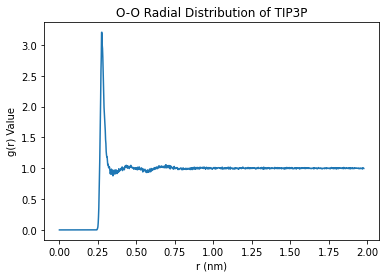

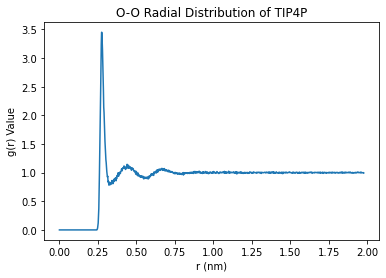

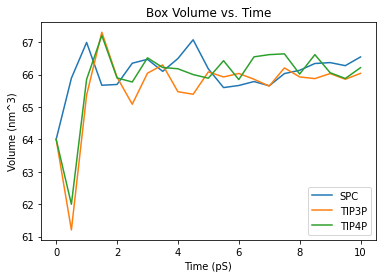

In [8]:
main()